In [1]:
import random as rand
import numpy as np
import math
import matplotlib.pyplot as plt
import cv2
import os

# 1. Making a Population:
Lets make a population of 20X20X3 i.e. 400 samples with each having a chromosome of size 3 i.e. 3 color components in this case, of random color. Existing in a leaf colored bg: #0D7C66 or rgb(13, 124, 102)

In [2]:
initial_population = np.random.randint(0, 256, (20, 20, 3), dtype=np.uint8)
print(initial_population)

[[[168 201 242]
  [116 105  47]
  [ 73 100 228]
  ...
  [ 16  96 115]
  [125 158 252]
  [145 120 179]]

 [[ 42 176 151]
  [248  86  96]
  [193 159  91]
  ...
  [233  92 136]
  [ 56  66 196]
  [213 119  99]]

 [[ 76  51 229]
  [117 153 209]
  [220 108 195]
  ...
  [ 97 145 248]
  [ 71   2 116]
  [144 104 158]]

 ...

 [[186 149  43]
  [ 63  11  49]
  [248 103  99]
  ...
  [242 198  66]
  [250 230  81]
  [158  45  10]]

 [[156 179  69]
  [153 221  36]
  [168 141  33]
  ...
  [105  51  89]
  [198 191 168]
  [ 42  44 119]]

 [[131 195 101]
  [244  44  51]
  [ 80 126 106]
  ...
  [ 72  13 216]
  [ 92  35  91]
  [ 57 154  43]]]


In [3]:
background = np.full((25, 25, 3), [13, 124, 102], dtype=np.uint8)
background[2:22, 2:22] = initial_population

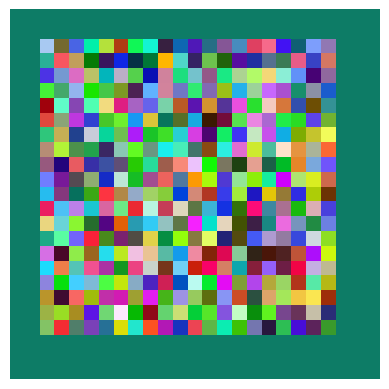

In [4]:
plt.imshow(background)
plt.axis('off')
plt.show()

# 2. Defining a fitness function for each sample in the population
This fitness function has to see how much are we able to blend inside the background, i am keeping it squared distance in RGB from the expected color of:
rgb(13, 124, 102) (leaf green) and rgb(103, 70, 54) (wood brown)

In [5]:
environment_color_leaves = [13, 124, 102]
environment_color_wood = [103, 70, 54]
def fitness_score(sample):
    leaf_color_distance = (sample[0]-environment_color_leaves[0])**2 + (sample[1]-environment_color_leaves[1])**2 + (sample[2]-environment_color_leaves[2])**2
    wood_color_distance = (sample[0]-environment_color_wood[0])**2 + (sample[1]-environment_color_wood[1])**2 + (sample[2]-environment_color_wood[2])**2
    return min(leaf_color_distance, wood_color_distance)

# 3. Simple step evolution algorithm
1. Evaluation of the whole population
2. Selecting the fittest
3. Crossover to make children
4. Mutation

In [6]:
def single_gen_evolution(population, selection_rate, mutation_rate):
    # evaluate fitness:
    fitness_values_of_population = np.zeros((20, 20))
    for i in range(20):
        for j in range(20):
            fitness_values_of_population[i][j] = fitness_score(population[i][j])
    # selection: 
    flattened_population = population.reshape(400, 3)
    flattened_fitness = fitness_values_of_population.flatten()
    sorted_indices = np.argsort(flattened_fitness)
    num_elements_to_select = int(400 * selection_rate)
    selected_indices = sorted_indices[:num_elements_to_select]
    selected_population = flattened_population[selected_indices]
    # crossover:
    required_children = 400 - num_elements_to_select
    new_generation = []
    for i in range(required_children):
        male = np.random.randint(0, num_elements_to_select)
        female = np.random.randint(0, num_elements_to_select)
        while(female!=male):
            female = np.random.randint(0, num_elements_to_select)
        child = [0, 0, 0]
        for color in range(3):
            choise = np.random.rand()
            if(choise<0.5):
                child[color] = selected_population[male][color]
            else:
                child[color] = selected_population[female][color]
        new_generation.append(child)
    total_population_flatten = np.vstack((selected_population, new_generation))
    # mutation:
    for i in range(400):
        for color in range(3):
            mutate = np.random.rand()
            if(mutate < mutation_rate):
                total_population_flatten[i][color] = np.random.randint(0, 256)
    final_population = total_population_flatten.reshape((20, 20, 3))
    return final_population

# 4. Over many generations:

In [7]:
generation_count = 50
selection_rate = 0.4
mutation_rate = 0.05

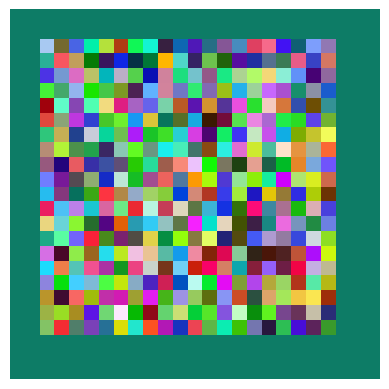

In [8]:
population = initial_population
background = np.full((25, 25, 3), [13, 124, 102], dtype=np.uint8)
background[2:22, 2:22] = population

plt.imshow(background)
plt.axis('off')

# Save the figure before showing it
plt.savefig(f'frame_0.png', bbox_inches='tight', pad_inches=0)
plt.show()
plt.close()

Generation number: 1


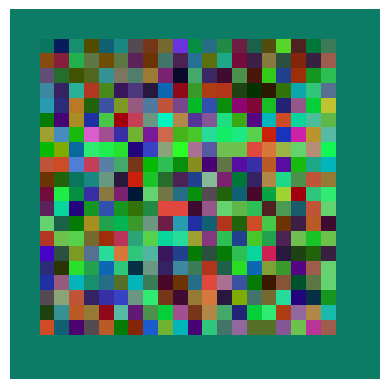

Generation number: 2


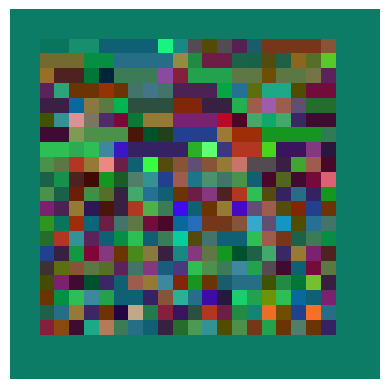

Generation number: 3


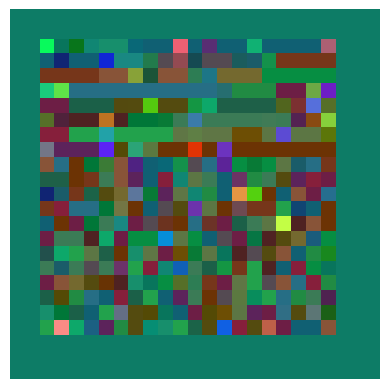

Generation number: 4


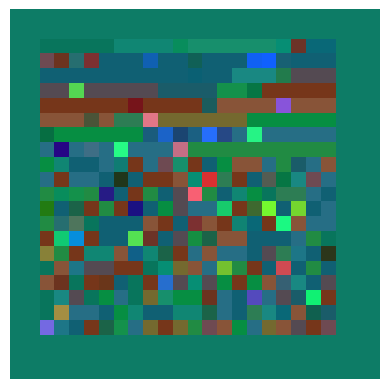

Generation number: 5


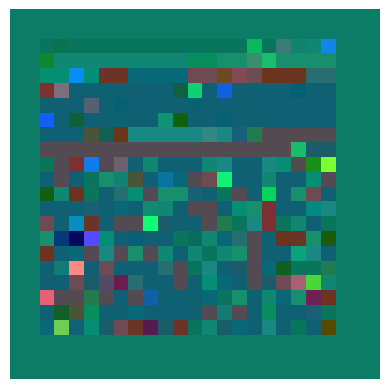

Generation number: 6


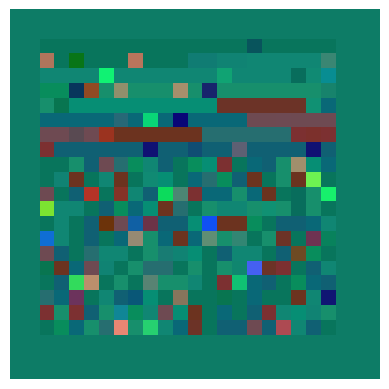

Generation number: 7


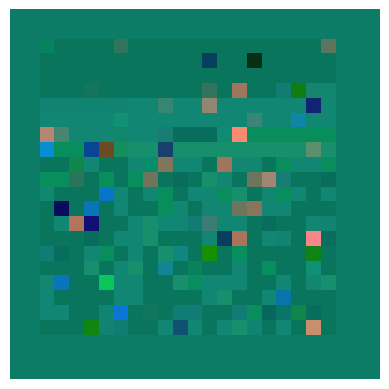

Generation number: 8


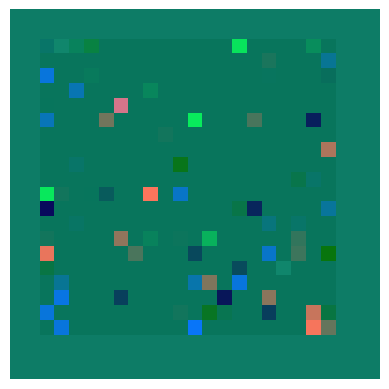

Generation number: 9


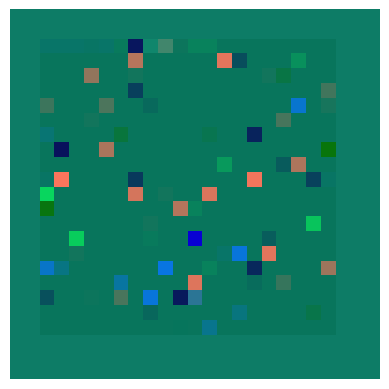

Generation number: 10


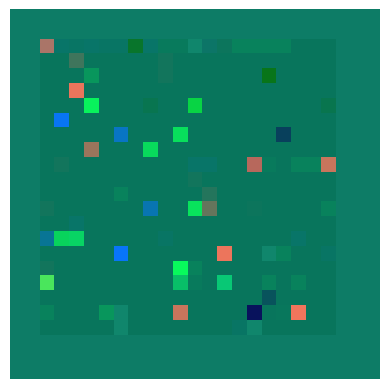

Generation number: 11


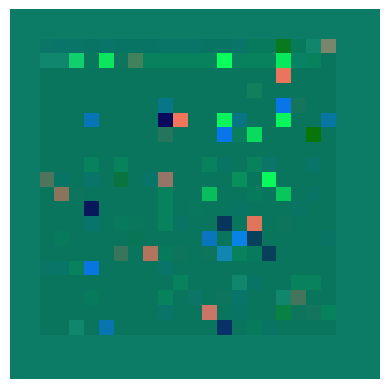

Generation number: 12


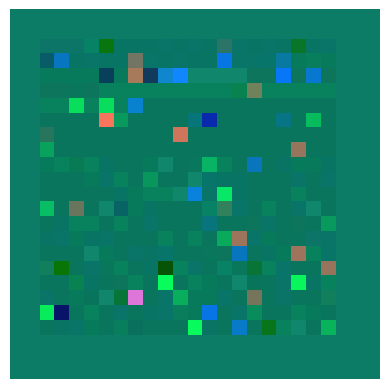

Generation number: 13


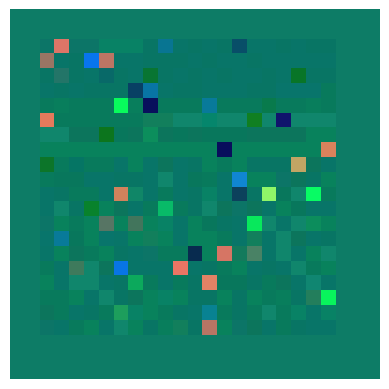

Generation number: 14


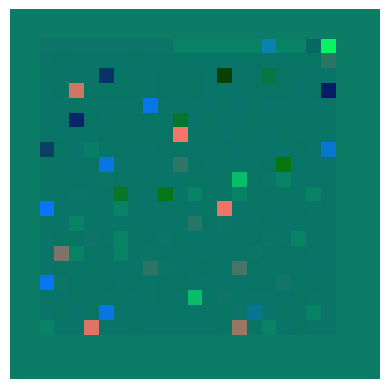

Generation number: 15


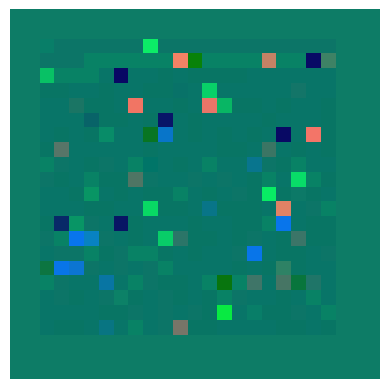

Generation number: 16


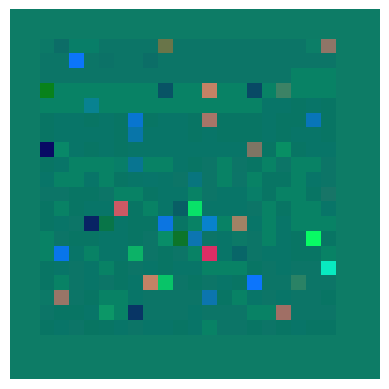

Generation number: 17


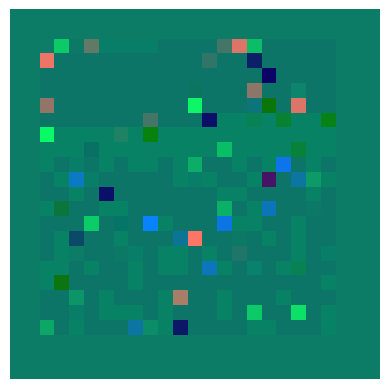

Generation number: 18


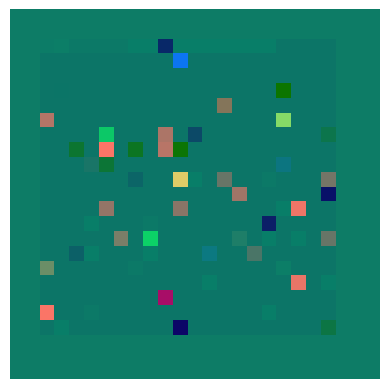

Generation number: 19


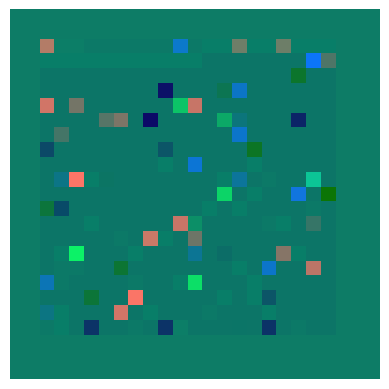

Generation number: 20


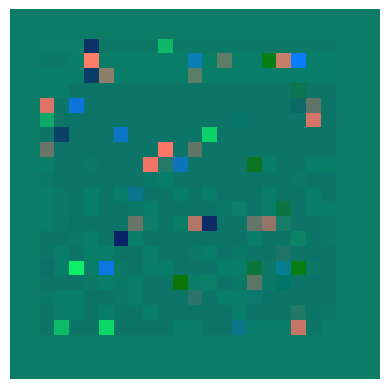

Generation number: 21


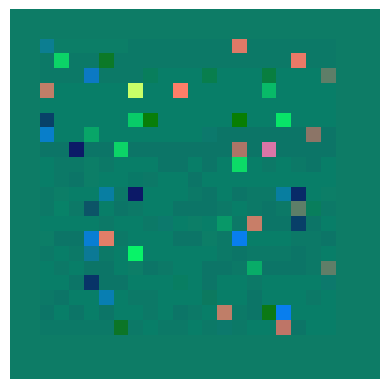

Generation number: 22


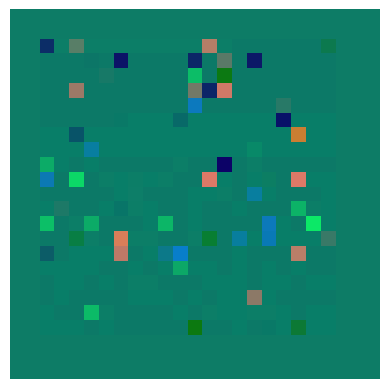

Generation number: 23


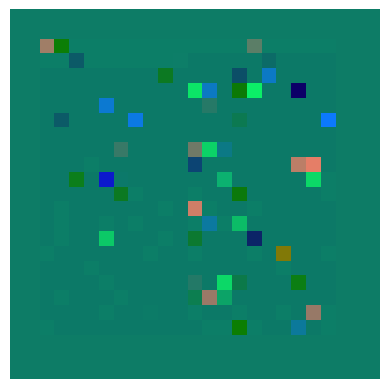

Generation number: 24


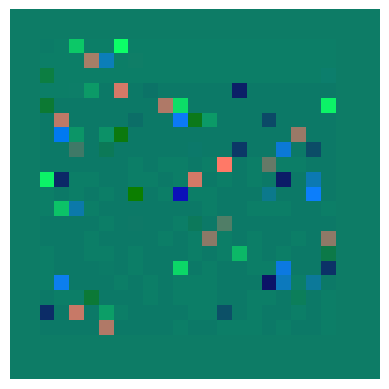

Generation number: 25


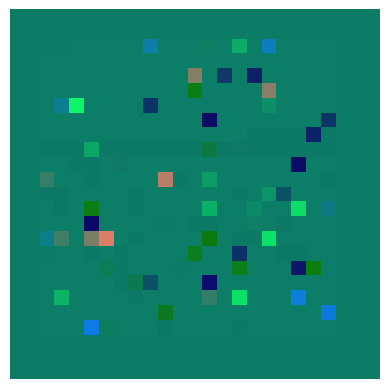

Generation number: 26


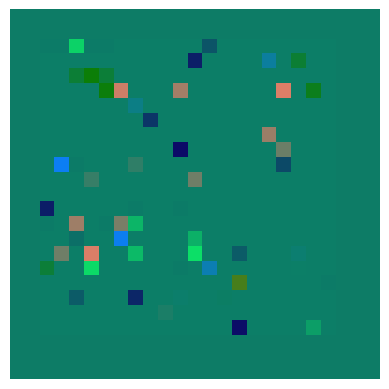

Generation number: 27


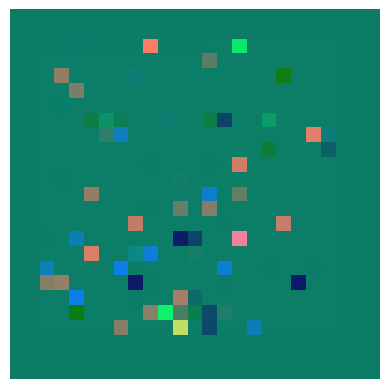

Generation number: 28


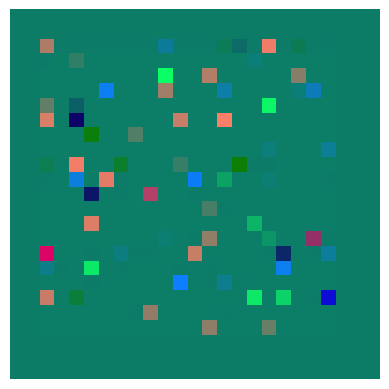

Generation number: 29


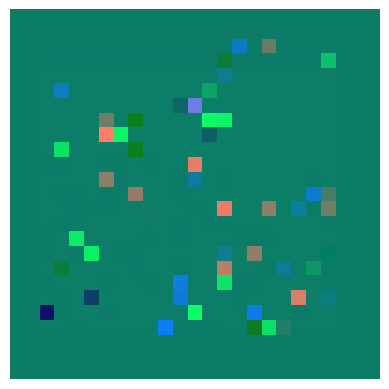

Generation number: 30


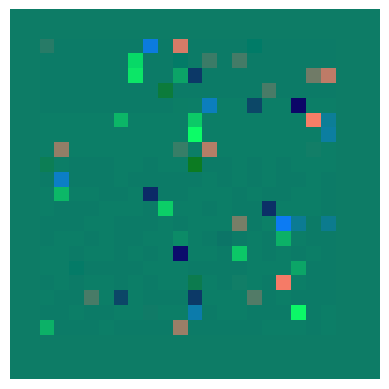

Generation number: 31


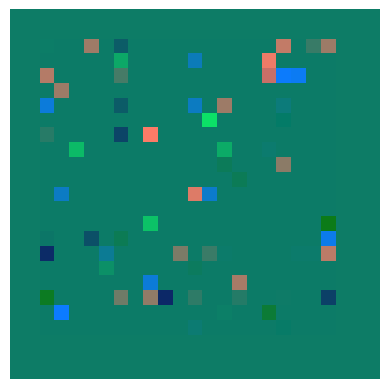

Generation number: 32


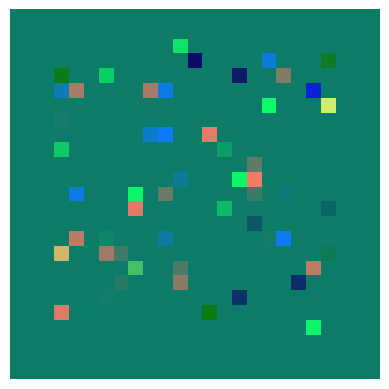

Generation number: 33


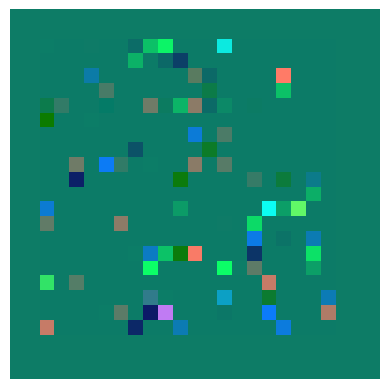

Generation number: 34


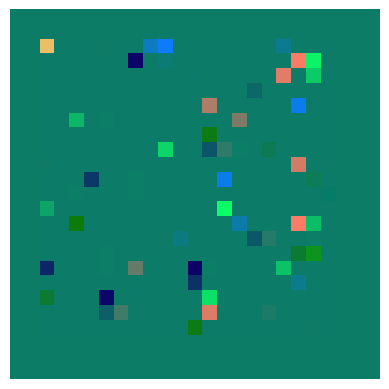

Generation number: 35


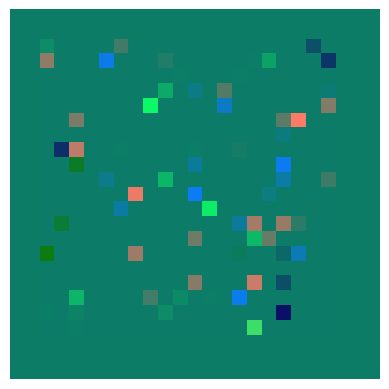

Generation number: 36


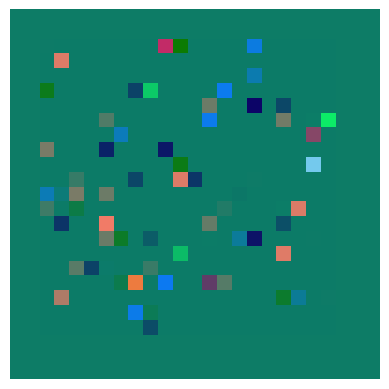

Generation number: 37


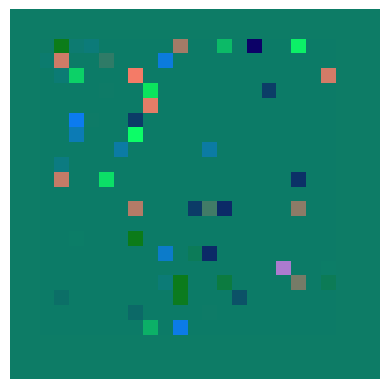

Generation number: 38


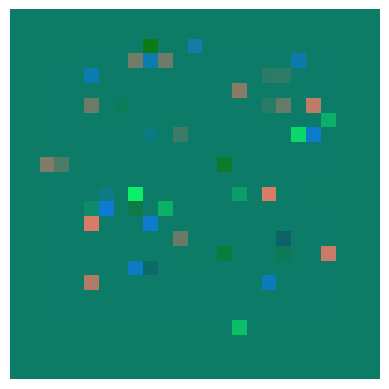

Generation number: 39


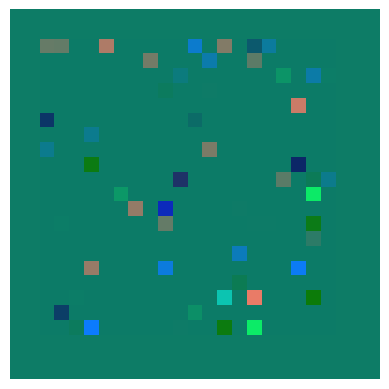

Generation number: 40


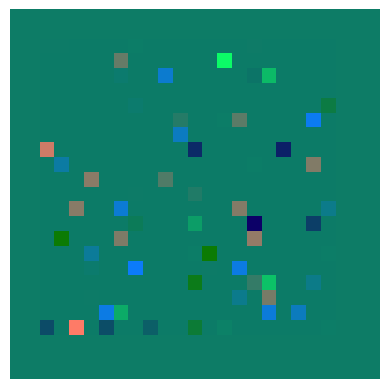

Generation number: 41


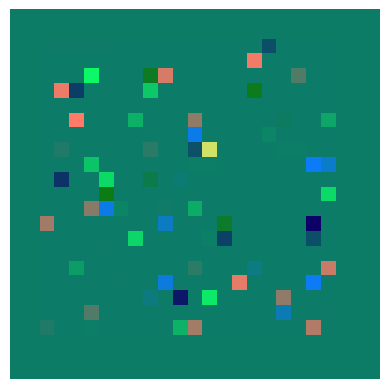

Generation number: 42


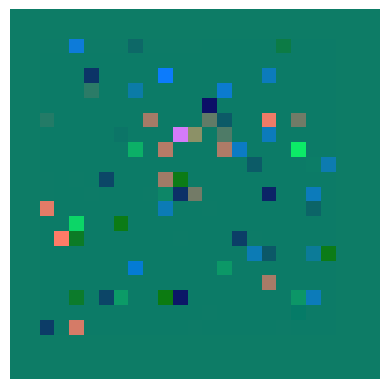

Generation number: 43


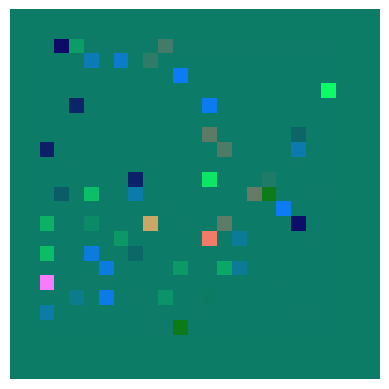

Generation number: 44


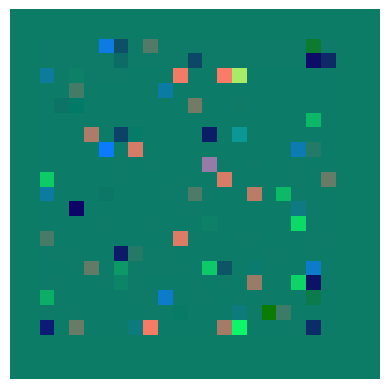

Generation number: 45


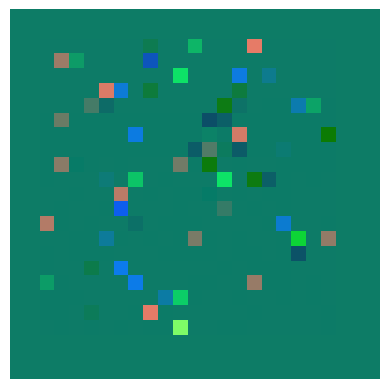

Generation number: 46


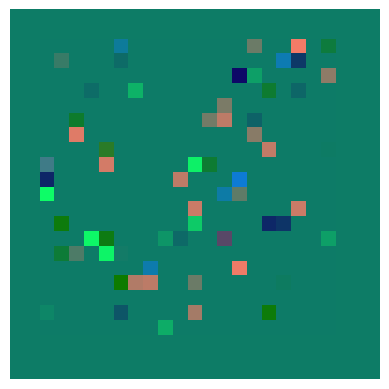

Generation number: 47


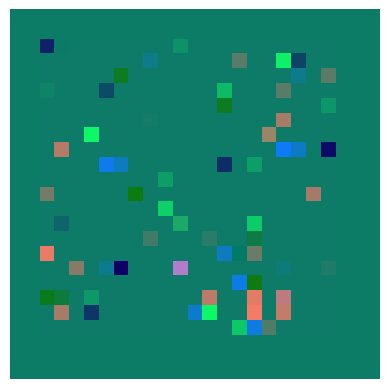

Generation number: 48


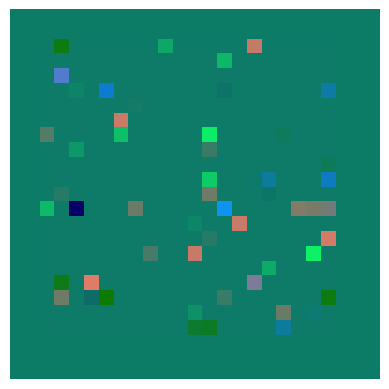

Generation number: 49


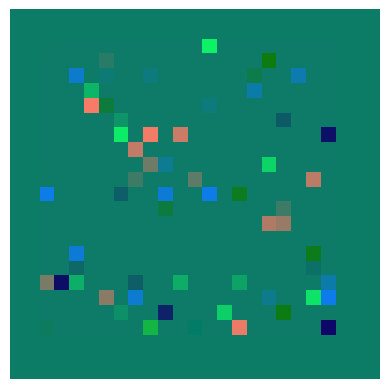

Generation number: 50


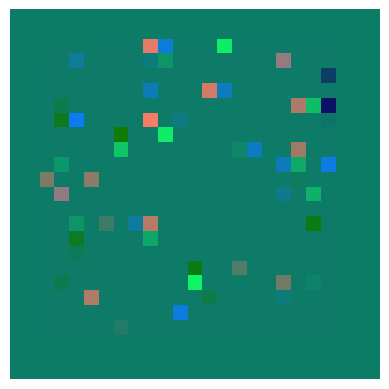

In [9]:
for i in range(generation_count):
    population = single_gen_evolution(population, selection_rate, mutation_rate)
    if(i%1==0):
        print(f"Generation number: {i + 1}")
        background = np.full((25, 25, 3), [13, 124, 102], dtype=np.uint8)
        background[2:22, 2:22] = population

        plt.imshow(background)
        plt.axis('off')

        # Save the figure before showing it
        plt.savefig(f'frame_{i + 1}.png', bbox_inches='tight', pad_inches=0)
        plt.show()
        plt.close()